## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [562]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from numpy import genfromtxt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [563]:
x= np.linspace(0,20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [564]:
y= -x + 2
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

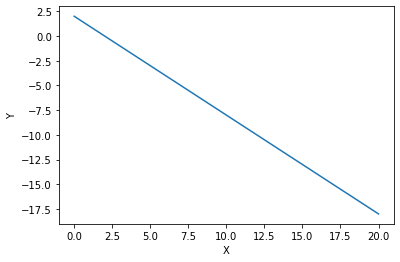

In [565]:
plt.plot(x,y)

plt.xlabel("X")
plt.ylabel("Y")

plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

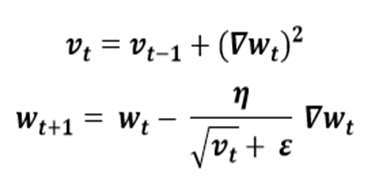

In [566]:
def adgrad(x, y,alpha,max_iter,epslon) :
    i = 0
    theta_0=0
    theta_1=0
    vt0=0
    vt1=0
    
    costList=[]
    theta_0_lst=[]
    theta_1_lst=[]
    m=len(y)
    while i<max_iter:
        h = x*theta_1 + theta_0
        #calculate cost function
        cost = (1/(2*m))  * np.sum((h - y) ** 2)
    
        #calculate theta0
        gradient_0 = np.sum(h - y) / m
        vt0= vt0 + (gradient_0 **2)
        theta_0 = theta_0 - ((alpha / (np.sqrt(vt0) + epslon)) * (gradient_0))
        
        #calculate theta1
        gradient_1 = np.sum((h - y)*(x))   / m
        vt1= vt1 + (gradient_1 **2)
        theta_1 = theta_1 - ((alpha / (np.sqrt(vt1) + epslon)) * (gradient_1))
        
        print("Iteration %d | Cost: %f | theta_0:%f | theta_1:%f" % (i,cost,theta_0,theta_1))
        #stop condition:
        if (gradient_0**2 + gradient_1**2)**0.5 <0.05:
            break
        if (theta_0**2 + theta_1**2)**0.5 <0.05:
            break    
        i += 1
        costList.append(cost)
        theta_0_lst.append(theta_0)
        theta_1_lst.append(theta_1)
       
    return theta_0_lst , theta_1_lst , h , costList

In [567]:
theta_0_lst , theta_1_lst , h ,costList = adgrad(x, y,0.2,1000,1e-8)

Iteration 0 | Cost: 49.346939 | theta_0:-0.200000 | theta_1:-0.200000
Iteration 1 | Cost: 27.922041 | theta_0:-0.317394 | theta_1:-0.319763
Iteration 2 | Cost: 18.084342 | theta_0:-0.400055 | theta_1:-0.406012
Iteration 3 | Cost: 12.385576 | theta_0:-0.462079 | theta_1:-0.472560
Iteration 4 | Cost: 8.780374 | theta_0:-0.509926 | theta_1:-0.525735
Iteration 5 | Cost: 6.394334 | theta_0:-0.547244 | theta_1:-0.569101
Iteration 6 | Cost: 4.772757 | theta_0:-0.576377 | theta_1:-0.604929
Iteration 7 | Cost: 3.651937 | theta_0:-0.598957 | theta_1:-0.634788
Iteration 8 | Cost: 2.868296 | theta_0:-0.616197 | theta_1:-0.659829
Iteration 9 | Cost: 2.315837 | theta_0:-0.629028 | theta_1:-0.680925
Iteration 10 | Cost: 1.923833 | theta_0:-0.638195 | theta_1:-0.698763
Iteration 11 | Cost: 1.644133 | theta_0:-0.644298 | theta_1:-0.713891
Iteration 12 | Cost: 1.443496 | theta_0:-0.647833 | theta_1:-0.726755
Iteration 13 | Cost: 1.298753 | theta_0:-0.649213 | theta_1:-0.737722
Iteration 14 | Cost: 1.193

In [568]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*x
print(y_pred)

[  1.85300598   1.44940449   1.04580301   0.64220152   0.23860004
  -0.16500145  -0.56860293  -0.97220442  -1.3758059   -1.77940739
  -2.18300887  -2.58661036  -2.99021184  -3.39381333  -3.79741481
  -4.2010163   -4.60461778  -5.00821927  -5.41182075  -5.81542224
  -6.21902372  -6.62262521  -7.02622669  -7.42982818  -7.83342966
  -8.23703115  -8.64063263  -9.04423412  -9.4478356   -9.85143709
 -10.25503857 -10.65864006 -11.06224154 -11.46584303 -11.86944451
 -12.273046   -12.67664748 -13.08024897 -13.48385045 -13.88745194
 -14.29105342 -14.69465491 -15.09825639 -15.50185788 -15.90545936
 -16.30906085 -16.71266233 -17.11626382 -17.5198653  -17.92346679]


## value of r2_score when alpha=0.2

In [569]:
print("r2_score is: " , r2_score(y, y_pred))

r2_score is:  0.9998393137031537


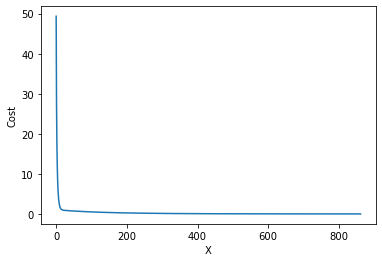

In [570]:
plt.plot(costList)
plt.xlabel("X")
plt.ylabel("Cost")
plt.show()

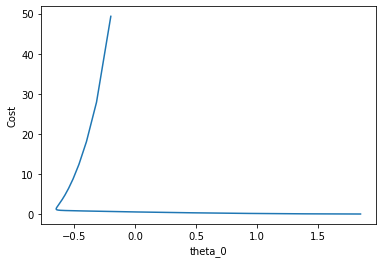

In [571]:
plt.plot(theta_0_lst,costList)
plt.xlabel("theta_0")
plt.ylabel("Cost")
plt.show()

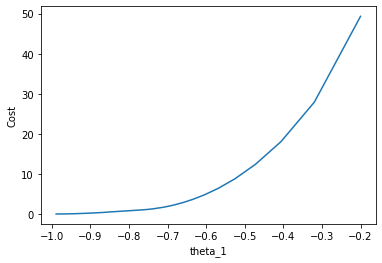

In [572]:
plt.plot(theta_1_lst,costList)
plt.xlabel("theta_1")
plt.ylabel("Cost")
plt.show()

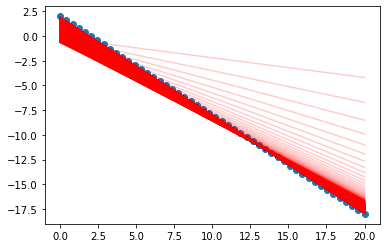

In [573]:
plt.scatter(x,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*x
    plt.plot(x,y_pred, c="r", alpha = 0.2)
plt.show()

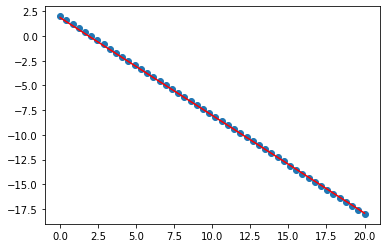

In [574]:
plt.scatter(x,y)
plt.plot(x,y_pred,c="r")
plt.show()

In [575]:
theta_0_lst , theta_1_lst , h ,costList = adgrad(x, y,0.1,1000,1e-8)

Iteration 0 | Cost: 49.346939 | theta_0:-0.100000 | theta_1:-0.100000
Iteration 1 | Cost: 37.856020 | theta_0:-0.165313 | theta_1:-0.165801
Iteration 2 | Cost: 31.147186 | theta_0:-0.215785 | theta_1:-0.216968
Iteration 3 | Cost: 26.397563 | theta_0:-0.257485 | theta_1:-0.259501
Iteration 4 | Cost: 22.760435 | theta_0:-0.293195 | theta_1:-0.296154
Iteration 5 | Cost: 19.852452 | theta_0:-0.324464 | theta_1:-0.328461
Iteration 6 | Cost: 17.462945 | theta_0:-0.352258 | theta_1:-0.357381
Iteration 7 | Cost: 15.462011 | theta_0:-0.377229 | theta_1:-0.383560
Iteration 8 | Cost: 13.763155 | theta_0:-0.399841 | theta_1:-0.407457
Iteration 9 | Cost: 12.305530 | theta_0:-0.420439 | theta_1:-0.429416
Iteration 10 | Cost: 11.044529 | theta_0:-0.439290 | theta_1:-0.449699
Iteration 11 | Cost: 9.946390 | theta_0:-0.456604 | theta_1:-0.468515
Iteration 12 | Cost: 8.984890 | theta_0:-0.472550 | theta_1:-0.486031
Iteration 13 | Cost: 8.139241 | theta_0:-0.487267 | theta_1:-0.502386
Iteration 14 | Cost

In [576]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*x
print(y_pred)

[  1.0577119    0.67879773   0.29988355  -0.07903062  -0.4579448
  -0.83685898  -1.21577315  -1.59468733  -1.9736015   -2.35251568
  -2.73142986  -3.11034403  -3.48925821  -3.86817238  -4.24708656
  -4.62600074  -5.00491491  -5.38382909  -5.76274327  -6.14165744
  -6.52057162  -6.89948579  -7.27839997  -7.65731415  -8.03622832
  -8.4151425   -8.79405667  -9.17297085  -9.55188503  -9.9307992
 -10.30971338 -10.68862755 -11.06754173 -11.44645591 -11.82537008
 -12.20428426 -12.58319843 -12.96211261 -13.34102679 -13.71994096
 -14.09885514 -14.47776932 -14.85668349 -15.23559767 -15.61451184
 -15.99342602 -16.3723402  -16.75125437 -17.13016855 -17.50908272]


## value of r2_score when alpha=0.1 

In [577]:
print("r2_score is: " , r2_score(y, y_pred))

r2_score is:  0.9933967110288637


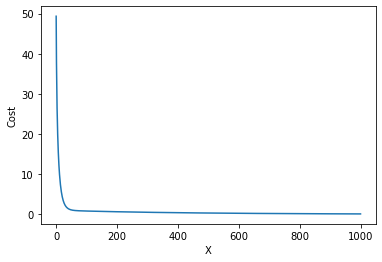

In [578]:
plt.plot(costList)
plt.xlabel("X")
plt.ylabel("Cost")
plt.show()

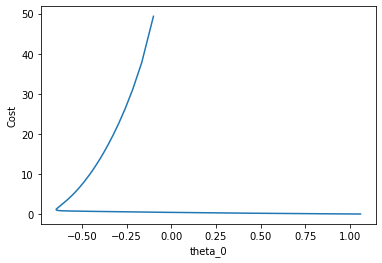

In [579]:
plt.plot(theta_0_lst,costList)
plt.xlabel("theta_0")
plt.ylabel("Cost")
plt.show()

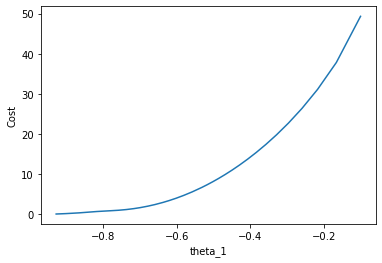

In [580]:
plt.plot(theta_1_lst,costList)
plt.xlabel("theta_1")
plt.ylabel("Cost")
plt.show()

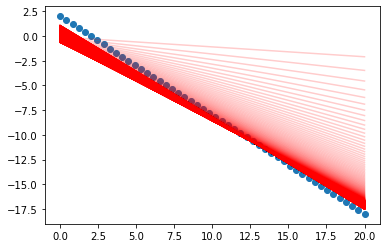

In [581]:
plt.scatter(x,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*x
    plt.plot(x,y_pred, c="r", alpha = 0.2)
plt.show()

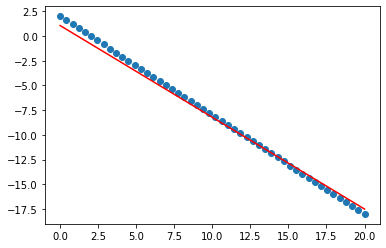

In [582]:
plt.scatter(x,y)
plt.plot(x,y_pred,c="r")
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

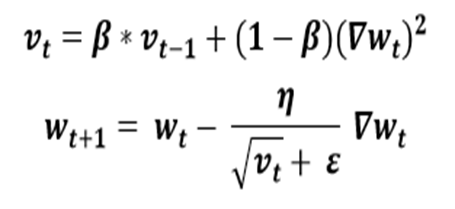

In [583]:
def RMSprob(x, y,alpha,beta,epslon,max_iter) :
    i = 0
    theta_0=0
    theta_1=0
    vt0=0
    vt1=0
    
    costList=[]
    theta_0_lst=[]
    theta_1_lst=[]
    m=len(y)
    while i<max_iter:
        h = x*theta_1 + theta_0
        #calculate cost function
        cost = (1/(2*m))  * np.sum((h - y) ** 2)
    
        #calculate theta0
        gradient_0 = np.sum(h - y) / m
        vt0=(beta*vt0) + ((1-beta)*(gradient_0 **2))
        theta_0 = theta_0 - ((alpha / (np.sqrt(vt0) + epslon)) * (gradient_0))
        
        #calculate theta1
        gradient_1 = np.sum((h - y)*(x))   / m
        vt1=(beta*vt1) + ((1-beta)*(gradient_1 **2))
        theta_1 = theta_1 - ((alpha / (np.sqrt(vt1) + epslon)) * (gradient_1))
        
        print("Iteration %d | Cost: %f | theta_0:%f | theta_1:%f" % (i,cost,theta_0,theta_1))
        #stop condition:
        if (gradient_0**2 + gradient_1**2)**0.5 <0.05:
            break
        if (theta_0**2 + theta_1**2)**0.5 <0.05:
            break    
        i += 1
        costList.append(cost)
        theta_0_lst.append(theta_0)
        theta_1_lst.append(theta_1)
       
    return theta_0_lst , theta_1_lst , h , costList

In [584]:
theta_0_lst , theta_1_lst , h ,costList=RMSprob(x, y,0.2,0.8,1e-08,1000)

Iteration 0 | Cost: 49.346939 | theta_0:-0.447214 | theta_1:-0.447214
Iteration 1 | Cost: 10.045956 | theta_0:-0.624060 | theta_1:-0.643103
Iteration 2 | Cost: 2.656007 | theta_0:-0.684156 | theta_1:-0.736642
Iteration 3 | Cost: 1.204421 | theta_0:-0.680560 | theta_1:-0.777813
Iteration 4 | Cost: 0.961567 | theta_0:-0.644217 | theta_1:-0.794449
Iteration 5 | Cost: 0.906217 | theta_0:-0.592417 | theta_1:-0.801862
Iteration 6 | Cost: 0.867701 | theta_0:-0.532841 | theta_1:-0.806949
Iteration 7 | Cost: 0.827899 | theta_0:-0.467879 | theta_1:-0.811970
Iteration 8 | Cost: 0.785930 | theta_0:-0.397901 | theta_1:-0.817362
Iteration 9 | Cost: 0.741954 | theta_0:-0.322880 | theta_1:-0.823143
Iteration 10 | Cost: 0.696214 | theta_0:-0.242843 | theta_1:-0.829310
Iteration 11 | Cost: 0.649022 | theta_0:-0.157899 | theta_1:-0.835852
Iteration 12 | Cost: 0.600750 | theta_0:-0.068247 | theta_1:-0.842752
Iteration 13 | Cost: 0.551829 | theta_0:0.025828 | theta_1:-0.849988
Iteration 14 | Cost: 0.502732

In [585]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*x
print(y_pred)

[  1.9          1.45102041   1.00204082   0.55306123   0.10408163
  -0.34489796  -0.79387755  -1.24285714  -1.69183673  -2.14081633
  -2.58979592  -3.03877551  -3.4877551   -3.93673469  -4.38571428
  -4.83469388  -5.28367347  -5.73265306  -6.18163265  -6.63061224
  -7.07959184  -7.52857143  -7.97755102  -8.42653061  -8.8755102
  -9.32448979  -9.77346939 -10.22244898 -10.67142857 -11.12040816
 -11.56938775 -12.01836735 -12.46734694 -12.91632653 -13.36530612
 -13.81428571 -14.2632653  -14.7122449  -15.16122449 -15.61020408
 -16.05918367 -16.50816326 -16.95714286 -17.40612245 -17.85510204
 -18.30408163 -18.75306122 -19.20204081 -19.65102041 -20.1       ]


## value of r2_score when alpha=0.2 , beta1=0.8 

In [586]:
print("r2_score is: " , r2_score(y, y_pred))

r2_score is:  0.9551235295270587


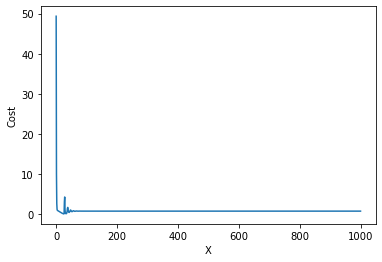

In [587]:
plt.plot(costList)
plt.xlabel("X")
plt.ylabel("Cost")
plt.show()

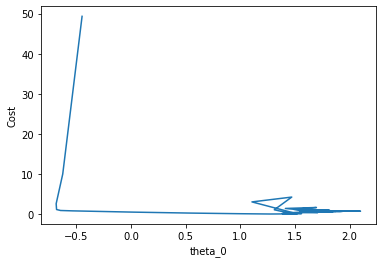

In [588]:
plt.plot(theta_0_lst,costList)
plt.xlabel("theta_0")
plt.ylabel("Cost")
plt.show()

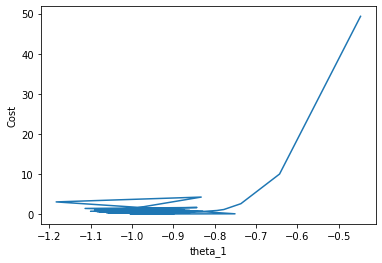

In [589]:
plt.plot(theta_1_lst,costList)
plt.xlabel("theta_1")
plt.ylabel("Cost")
plt.show()

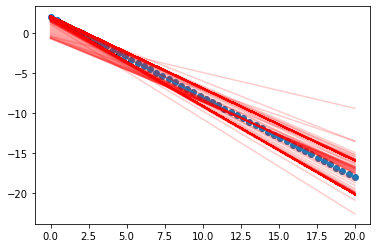

In [590]:
plt.scatter(x,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*x
    plt.plot(x,y_pred, c="r", alpha = 0.2)
plt.show()

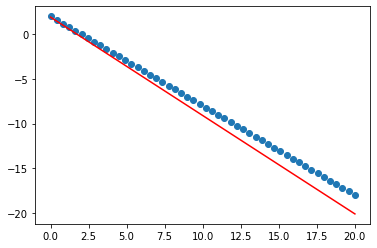

In [591]:
plt.scatter(x,y)
plt.plot(x,y_pred,c="r")
plt.show()

In [592]:
theta_0_lst , theta_1_lst , h ,costList=RMSprob(x, y,0.1,0.8,1e-08,1000)

Iteration 0 | Cost: 49.346939 | theta_0:-0.223607 | theta_1:-0.223607
Iteration 1 | Cost: 25.804101 | theta_0:-0.360503 | theta_1:-0.363574
Iteration 2 | Cost: 15.041227 | theta_0:-0.459643 | theta_1:-0.467973
Iteration 3 | Cost: 9.001707 | theta_0:-0.534295 | theta_1:-0.550210
Iteration 4 | Cost: 5.437337 | theta_0:-0.589793 | theta_1:-0.616009
Iteration 5 | Cost: 3.339196 | theta_0:-0.628694 | theta_1:-0.668413
Iteration 6 | Cost: 2.143400 | theta_0:-0.652466 | theta_1:-0.709399
Iteration 7 | Cost: 1.497073 | theta_0:-0.662263 | theta_1:-0.740556
Iteration 8 | Cost: 1.169940 | theta_0:-0.659333 | theta_1:-0.763414
Iteration 9 | Cost: 1.014022 | theta_0:-0.645188 | theta_1:-0.779564
Iteration 10 | Cost: 0.940088 | theta_0:-0.621566 | theta_1:-0.790642
Iteration 11 | Cost: 0.899713 | theta_0:-0.590245 | theta_1:-0.798222
Iteration 12 | Cost: 0.870128 | theta_0:-0.552814 | theta_1:-0.803671
Iteration 13 | Cost: 0.842408 | theta_0:-0.510496 | theta_1:-0.808045
Iteration 14 | Cost: 0.8137

In [593]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*x
print(y_pred)

[  1.95         1.52142857   1.09285714   0.66428572   0.23571429
  -0.19285714  -0.62142857  -1.05        -1.47857143  -1.90714286
  -2.33571428  -2.76428571  -3.19285714  -3.62142857  -4.05
  -4.47857143  -4.90714286  -5.33571428  -5.76428571  -6.19285714
  -6.62142857  -7.05        -7.47857143  -7.90714286  -8.33571428
  -8.76428571  -9.19285714  -9.62142857 -10.05       -10.47857143
 -10.90714286 -11.33571428 -11.76428571 -12.19285714 -12.62142857
 -13.05       -13.47857143 -13.90714286 -14.33571428 -14.76428571
 -15.19285714 -15.62142857 -16.05       -16.47857143 -16.90714285
 -17.33571428 -17.76428571 -18.19285714 -18.62142857 -19.05      ]


## value of r2_score when alpha=0.1 , beta1=0.8 

In [594]:
print("r2_score is: " , r2_score(y, y_pred))

r2_score is:  0.9887808824105883


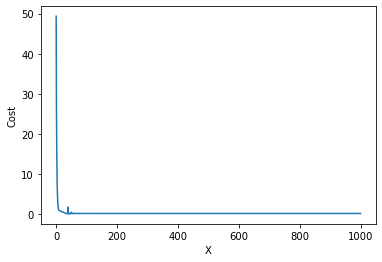

In [595]:
plt.plot(costList)
plt.xlabel("X")
plt.ylabel("Cost")
plt.show()

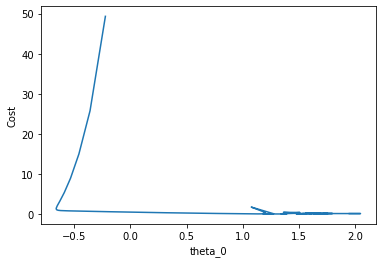

In [596]:
plt.plot(theta_0_lst,costList)
plt.xlabel("theta_0")
plt.ylabel("Cost")
plt.show()

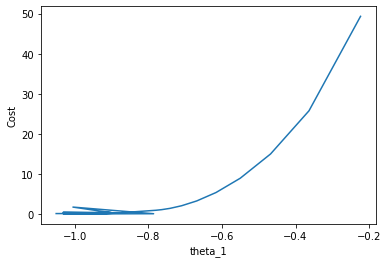

In [597]:
plt.plot(theta_1_lst,costList)
plt.xlabel("theta_1")
plt.ylabel("Cost")
plt.show()

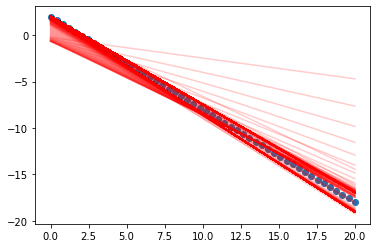

In [598]:
plt.scatter(x,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*x
    plt.plot(x,y_pred, c="r", alpha = 0.2)
plt.show()

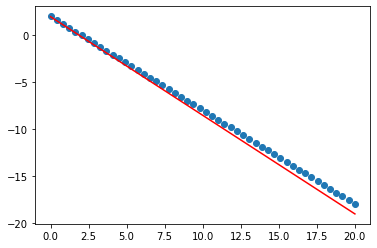

In [599]:
plt.scatter(x,y)
plt.plot(x,y_pred,c="r")
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

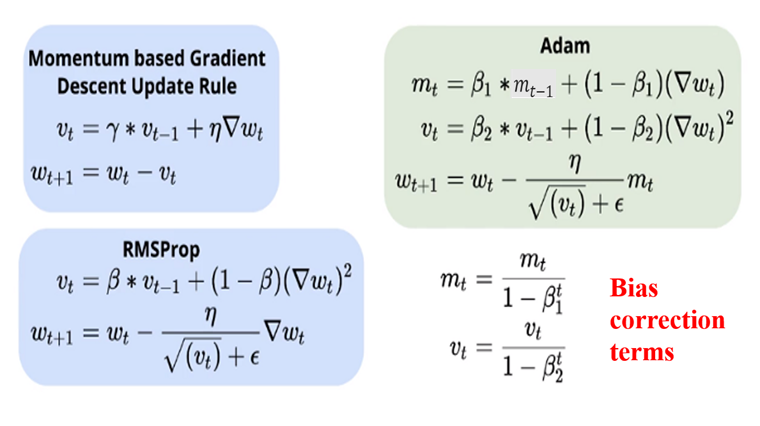

In [600]:
def adam(x, y,alpha,beta_1,beta_2,max_iter,epslon) :
    i = 0
    theta_0=0
    theta_1=0
    vt0=0
    vt1=0
    mt0=0
    mt1=0
    m_hat0=0
    m_hat1=0
    v_hat1=0
    v_hat0=0
    
    costList=[]
    theta_0_lst=[]
    theta_1_lst=[]
    theta_0_bias_lst=[]
    theta_1_bias_lst=[]
    m=len(y)
    while i<max_iter:
        h = x*theta_1 + theta_0
        #calculate cost function
        cost = (1/(2*m))  * np.sum((h - y) ** 2)
    
        #calculate theta0
        gradient_0 = np.sum(h - y) / m
        mt0=(beta_1 * mt0) + ((1-beta_1)*gradient_0)
        vt0=(beta_2 * vt0) +((1-beta_2)*(gradient_0**2))
        theta_0 = theta_0 - ((alpha / (np.sqrt(vt0) + epslon)) *mt0)
        m_hat0=mt0/(1-(beta_1**(i+1)))
        v_hat0=vt0 / (1-(beta_2**(i+1)))
        theta_0_bias = theta_0 - ((alpha / np.sqrt(vt0))*m_hat0)
        
        #calculate theta1
        gradient_1 = np.sum((h - y)*(x))   / m
        
        mt1=(beta_1 * mt1) + ((1-beta_1)*gradient_1)
        vt1=(beta_2 * vt1) +((1-beta_2)*(gradient_1**2))
        theta_1 = theta_1 - ((alpha / (np.sqrt(vt1) + epslon)) *mt1)
        m_hat1=mt1/(1-(beta_1**(i+1)))
        v_hat1=vt1 / (1-(beta_2**(i+1)))
        theta_1_bias = theta_1 - ((alpha / np.sqrt(vt0))*m_hat1)
        
        print("Iteration %d | Cost: %f |theta_0_bias:%f | theta_1_bias:%f " % (i,cost,theta_0_bias,theta_1_bias))
        #stop condition:
        if (gradient_0**2 + gradient_1**2)**0.5 <0.05:
            break
        if (theta_0_bias**2 + theta_1_bias**2)**0.5 <0.05:
            break    
        i += 1
        costList.append(cost)
        theta_0_lst.append(theta_0)
        theta_0_bias_lst.append(theta_0_bias)
        theta_1_lst.append(theta_1)
        theta_1_bias_lst.append(theta_1_bias)
       
    return theta_0_bias_lst,theta_1_bias_lst, costList  

In [601]:
theta_0_bias_lst,theta_1_bias_lst, costList  = adam(x, y,0.2,0.8,0.9,1000,1e-08)

Iteration 0 | Cost: 49.346939 |theta_0_bias:-0.758947 | theta_1_bias:-9.193838 
Iteration 1 | Cost: 35.072805 |theta_0_bias:-0.744193 | theta_1_bias:-6.859306 
Iteration 2 | Cost: 20.297307 |theta_0_bias:-0.838982 | theta_1_bias:-5.884168 
Iteration 3 | Cost: 8.815143 |theta_0_bias:-0.955295 | theta_1_bias:-5.236931 
Iteration 4 | Cost: 2.385116 |theta_0_bias:-1.051956 | theta_1_bias:-4.582771 
Iteration 5 | Cost: 1.096901 |theta_0_bias:-1.097300 | theta_1_bias:-3.751452 
Iteration 6 | Cost: 3.356843 |theta_0_bias:-1.077281 | theta_1_bias:-2.750127 
Iteration 7 | Cost: 6.447394 |theta_0_bias:-1.003188 | theta_1_bias:-1.760326 
Iteration 8 | Cost: 8.058554 |theta_0_bias:-0.895898 | theta_1_bias:-0.949354 
Iteration 9 | Cost: 7.493458 |theta_0_bias:-0.770922 | theta_1_bias:-0.361496 
Iteration 10 | Cost: 5.439188 |theta_0_bias:-0.638740 | theta_1_bias:0.024069 
Iteration 11 | Cost: 3.075258 |theta_0_bias:-0.508627 | theta_1_bias:0.231427 
Iteration 12 | Cost: 1.387385 |theta_0_bias:-0.39

In [602]:
y_pred=theta_0_bias_lst[-1]+ theta_1_bias_lst[-1]*x
print(y_pred)

[  1.89409159   1.454996     1.0159004    0.57680481   0.13770921
  -0.30138638  -0.74048198  -1.17957757  -1.61867317  -2.05776876
  -2.49686435  -2.93595995  -3.37505554  -3.81415114  -4.25324673
  -4.69234233  -5.13143792  -5.57053352  -6.00962911  -6.4487247
  -6.8878203   -7.32691589  -7.76601149  -8.20510708  -8.64420268
  -9.08329827  -9.52239387  -9.96148946 -10.40058506 -10.83968065
 -11.27877624 -11.71787184 -12.15696743 -12.59606303 -13.03515862
 -13.47425422 -13.91334981 -14.35244541 -14.791541   -15.23063659
 -15.66973219 -16.10882778 -16.54792338 -16.98701897 -17.42611457
 -17.86521016 -18.30430576 -18.74340135 -19.18249694 -19.62159254]


## value of r2_score when alpha=0.2 , beta1=0.8 , beta2=0.9 

In [603]:
print("r2_score is: " , r2_score(y, y_pred))

r2_score is:  0.9727525309732934


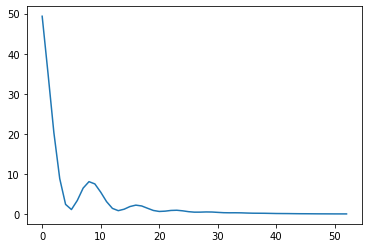

In [604]:
plt.plot(costList)
plt.show()

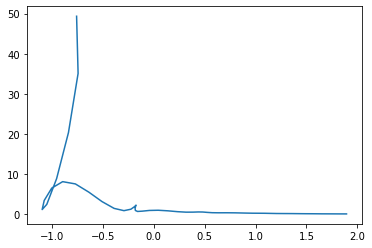

In [605]:
plt.plot(theta_0_bias_lst,costList)
plt.show()

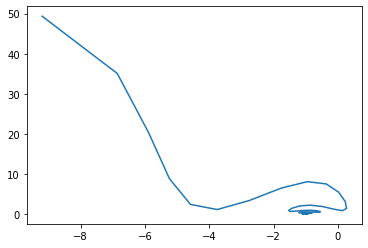

In [606]:
plt.plot(theta_1_bias_lst,costList)
plt.show()

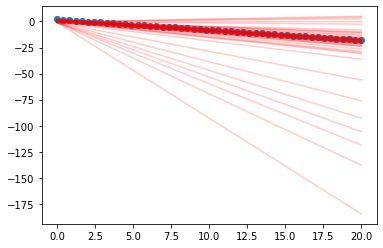

In [607]:
plt.scatter(x,y)
for i in range(len(theta_0_bias_lst)):
    y_pred=theta_0_bias_lst[i] + theta_1_bias_lst[i]*x
    plt.plot(x,y_pred, c="r", alpha = 0.2)
plt.show()

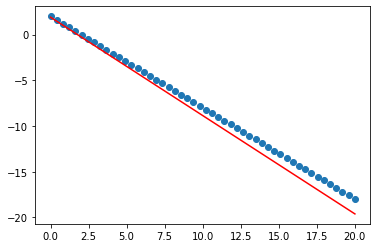

In [608]:
plt.scatter(x,y)
plt.plot(x,y_pred,c="r")
plt.show()

In [609]:
theta_0_bias_lst,theta_1_bias_lst, costList  = adam(x, y,0.1,0.8,0.9,1000,1e-08)

Iteration 0 | Cost: 49.346939 |theta_0_bias:-0.379473 | theta_1_bias:-4.596919 
Iteration 1 | Cost: 41.898484 |theta_0_bias:-0.374098 | theta_1_bias:-3.436204 
Iteration 2 | Cost: 33.136933 |theta_0_bias:-0.427702 | theta_1_bias:-2.984819 
Iteration 3 | Cost: 24.535386 |theta_0_bias:-0.501198 | theta_1_bias:-2.752415 
Iteration 4 | Cost: 16.891253 |theta_0_bias:-0.582048 | theta_1_bias:-2.611051 
Iteration 5 | Cost: 10.646284 |theta_0_bias:-0.663305 | theta_1_bias:-2.506486 
Iteration 6 | Cost: 6.000822 |theta_0_bias:-0.739680 | theta_1_bias:-2.407698 
Iteration 7 | Cost: 2.966235 |theta_0_bias:-0.806408 | theta_1_bias:-2.293132 
Iteration 8 | Cost: 1.392901 |theta_0_bias:-0.859045 | theta_1_bias:-2.147387 
Iteration 9 | Cost: 0.993645 |theta_0_bias:-0.893901 | theta_1_bias:-1.962617 
Iteration 10 | Cost: 1.380023 |theta_0_bias:-0.908841 | theta_1_bias:-1.741586 
Iteration 11 | Cost: 2.124285 |theta_0_bias:-0.903920 | theta_1_bias:-1.498270 
Iteration 12 | Cost: 2.843089 |theta_0_bias:

In [610]:
y_pred=theta_0_bias_lst[-1]+ theta_1_bias_lst[-1]*x
print(y_pred)

[  1.94881353   1.53732716   1.12584078   0.7143544    0.30286802
  -0.10861836  -0.52010473  -0.93159111  -1.34307749  -1.75456387
  -2.16605025  -2.57753662  -2.989023    -3.40050938  -3.81199576
  -4.22348214  -4.63496851  -5.04645489  -5.45794127  -5.86942765
  -6.28091403  -6.6924004   -7.10388678  -7.51537316  -7.92685954
  -8.33834592  -8.74983229  -9.16131867  -9.57280505  -9.98429143
 -10.39577781 -10.80726418 -11.21875056 -11.63023694 -12.04172332
 -12.4532097  -12.86469607 -13.27618245 -13.68766883 -14.09915521
 -14.51064159 -14.92212796 -15.33361434 -15.74510072 -16.1565871
 -16.56807348 -16.97955985 -17.39104623 -17.80253261 -18.21401899]


## value of r2_score when alpha=0.1 , beta1=0.8 , beta2=0.9 

In [611]:
print("r2_score is: " , r2_score(y, y_pred))

r2_score is:  0.9994268958840585


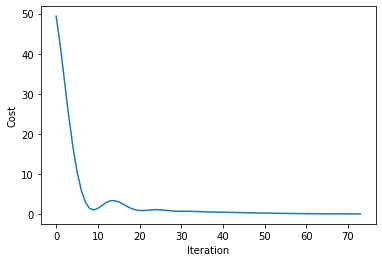

In [612]:
plt.plot(costList)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

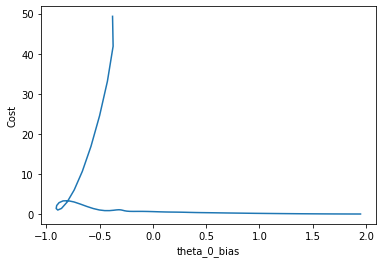

In [613]:
plt.plot(theta_0_bias_lst,costList)
plt.xlabel("theta_0_bias")
plt.ylabel("Cost")
plt.show()

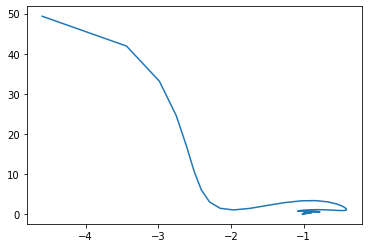

In [614]:
plt.plot(theta_1_bias_lst,costList)
plt.show()

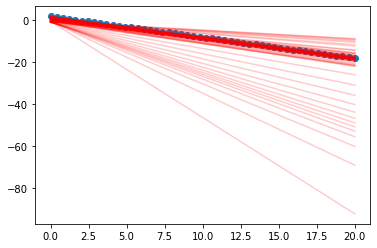

In [615]:
plt.scatter(x,y)
for i in range(len(theta_0_bias_lst)):
    y_pred=theta_0_bias_lst[i] + theta_1_bias_lst[i]*x
    plt.plot(x,y_pred, c="r", alpha = 0.2)
plt.show()

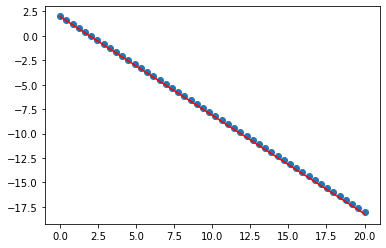

In [616]:
plt.scatter(x,y)
plt.plot(x,y_pred,c="r")
plt.show()

## Comparison  

## 1) Adagrad when alpha = 0.1

In [617]:
theta_0_lst_Adagrad , theta_1_lst_Adagrad , h ,costList_Adagrad = adgrad(x, y,0.1,300,1e-8)

Iteration 0 | Cost: 49.346939 | theta_0:-0.100000 | theta_1:-0.100000
Iteration 1 | Cost: 37.856020 | theta_0:-0.165313 | theta_1:-0.165801
Iteration 2 | Cost: 31.147186 | theta_0:-0.215785 | theta_1:-0.216968
Iteration 3 | Cost: 26.397563 | theta_0:-0.257485 | theta_1:-0.259501
Iteration 4 | Cost: 22.760435 | theta_0:-0.293195 | theta_1:-0.296154
Iteration 5 | Cost: 19.852452 | theta_0:-0.324464 | theta_1:-0.328461
Iteration 6 | Cost: 17.462945 | theta_0:-0.352258 | theta_1:-0.357381
Iteration 7 | Cost: 15.462011 | theta_0:-0.377229 | theta_1:-0.383560
Iteration 8 | Cost: 13.763155 | theta_0:-0.399841 | theta_1:-0.407457
Iteration 9 | Cost: 12.305530 | theta_0:-0.420439 | theta_1:-0.429416
Iteration 10 | Cost: 11.044529 | theta_0:-0.439290 | theta_1:-0.449699
Iteration 11 | Cost: 9.946390 | theta_0:-0.456604 | theta_1:-0.468515
Iteration 12 | Cost: 8.984890 | theta_0:-0.472550 | theta_1:-0.486031
Iteration 13 | Cost: 8.139241 | theta_0:-0.487267 | theta_1:-0.502386
Iteration 14 | Cost

In [618]:
y_pred_Adagrad=theta_0_lst_Adagrad[-1]+ theta_1_lst_Adagrad[-1]*x
print(y_pred_Adagrad)

[-7.85495706e-03 -3.53561556e-01 -6.99268154e-01 -1.04497475e+00
 -1.39068135e+00 -1.73638795e+00 -2.08209455e+00 -2.42780115e+00
 -2.77350775e+00 -3.11921434e+00 -3.46492094e+00 -3.81062754e+00
 -4.15633414e+00 -4.50204074e+00 -4.84774734e+00 -5.19345394e+00
 -5.53916054e+00 -5.88486713e+00 -6.23057373e+00 -6.57628033e+00
 -6.92198693e+00 -7.26769353e+00 -7.61340013e+00 -7.95910673e+00
 -8.30481332e+00 -8.65051992e+00 -8.99622652e+00 -9.34193312e+00
 -9.68763972e+00 -1.00333463e+01 -1.03790529e+01 -1.07247595e+01
 -1.10704661e+01 -1.14161727e+01 -1.17618793e+01 -1.21075859e+01
 -1.24532925e+01 -1.27989991e+01 -1.31447057e+01 -1.34904123e+01
 -1.38361189e+01 -1.41818255e+01 -1.45275321e+01 -1.48732387e+01
 -1.52189453e+01 -1.55646519e+01 -1.59103585e+01 -1.62560651e+01
 -1.66017717e+01 -1.69474783e+01]


In [619]:
print("r2_score is: " , r2_score(y, y_pred_Adagrad))

r2_score is:  0.9700087044293789


## 2) RMS when alpha = 0.1 , beta1=0.8 

In [620]:
theta_0_lst_RMS , theta_1_lst_RMS , h_RMS ,costList_RMS=RMSprob(x, y,0.1,0.8,1e-8,300)

Iteration 0 | Cost: 49.346939 | theta_0:-0.223607 | theta_1:-0.223607
Iteration 1 | Cost: 25.804101 | theta_0:-0.360503 | theta_1:-0.363574
Iteration 2 | Cost: 15.041227 | theta_0:-0.459643 | theta_1:-0.467973
Iteration 3 | Cost: 9.001707 | theta_0:-0.534295 | theta_1:-0.550210
Iteration 4 | Cost: 5.437337 | theta_0:-0.589793 | theta_1:-0.616009
Iteration 5 | Cost: 3.339196 | theta_0:-0.628694 | theta_1:-0.668413
Iteration 6 | Cost: 2.143400 | theta_0:-0.652466 | theta_1:-0.709399
Iteration 7 | Cost: 1.497073 | theta_0:-0.662263 | theta_1:-0.740556
Iteration 8 | Cost: 1.169940 | theta_0:-0.659333 | theta_1:-0.763414
Iteration 9 | Cost: 1.014022 | theta_0:-0.645188 | theta_1:-0.779564
Iteration 10 | Cost: 0.940088 | theta_0:-0.621566 | theta_1:-0.790642
Iteration 11 | Cost: 0.899713 | theta_0:-0.590245 | theta_1:-0.798222
Iteration 12 | Cost: 0.870128 | theta_0:-0.552814 | theta_1:-0.803671
Iteration 13 | Cost: 0.842408 | theta_0:-0.510496 | theta_1:-0.808045
Iteration 14 | Cost: 0.8137

In [621]:
y_pred_RMS=theta_0_lst_RMS[-1]+ theta_1_lst_RMS[-1]*x
print(y_pred_RMS)

[  1.94997128   1.52140075   1.09283021   0.66425967   0.23568913
  -0.1928814   -0.62145194  -1.05002248  -1.47859302  -1.90716355
  -2.33573409  -2.76430463  -3.19287517  -3.6214457   -4.05001624
  -4.47858678  -4.90715732  -5.33572785  -5.76429839  -6.19286893
  -6.62143947  -7.05001     -7.47858054  -7.90715108  -8.33572162
  -8.76429215  -9.19286269  -9.62143323 -10.05000377 -10.4785743
 -10.90714484 -11.33571538 -11.76428591 -12.19285645 -12.62142699
 -13.04999753 -13.47856806 -13.9071386  -14.33570914 -14.76427968
 -15.19285021 -15.62142075 -16.04999129 -16.47856183 -16.90713236
 -17.3357029  -17.76427344 -18.19284398 -18.62141451 -19.04998505]


In [622]:
print("r2_score is: " , r2_score(y, y_pred_RMS))

r2_score is:  0.9887808824046092


## 3) Adam when alpha = 0.1 , beta1=0.8 , beta2 =0.8

In [623]:
theta_0_bias_lst_Adam,theta_1_bias_lst_Adam, costList_Adam  = adam(x, y,0.1,0.8,0.8,300,1e-08)

Iteration 0 | Cost: 49.346939 |theta_0_bias:-0.268328 | theta_1_bias:-3.250513 
Iteration 1 | Cost: 44.015596 |theta_0_bias:-0.271275 | theta_1_bias:-2.499926 
Iteration 2 | Cost: 37.354688 |theta_0_bias:-0.317264 | theta_1_bias:-2.237075 
Iteration 3 | Cost: 30.313700 |theta_0_bias:-0.380284 | theta_1_bias:-2.130438 
Iteration 4 | Cost: 23.461140 |theta_0_bias:-0.452456 | theta_1_bias:-2.095540 
Iteration 5 | Cost: 17.182311 |theta_0_bias:-0.529776 | theta_1_bias:-2.098107 
Iteration 6 | Cost: 11.747643 |theta_0_bias:-0.609393 | theta_1_bias:-2.119288 
Iteration 7 | Cost: 7.343371 |theta_0_bias:-0.688598 | theta_1_bias:-2.144959 
Iteration 8 | Cost: 4.084026 |theta_0_bias:-0.764169 | theta_1_bias:-2.160566 
Iteration 9 | Cost: 2.011337 |theta_0_bias:-0.831759 | theta_1_bias:-2.147528 
Iteration 10 | Cost: 1.079285 |theta_0_bias:-0.885518 | theta_1_bias:-2.081659 
Iteration 11 | Cost: 1.126197 |theta_0_bias:-0.918782 | theta_1_bias:-1.938700 
Iteration 12 | Cost: 1.847771 |theta_0_bias

In [624]:
y_pred_Adam=theta_0_bias_lst_Adam[-1]+ theta_1_bias_lst_Adam[-1]*x
print(y_pred_Adam)

[  2.15203741   1.72655807   1.30107873   0.87559939   0.45012005
   0.0246407   -0.40083864  -0.82631798  -1.25179732  -1.67727666
  -2.102756    -2.52823534  -2.95371468  -3.37919402  -3.80467336
  -4.2301527   -4.65563204  -5.08111138  -5.50659072  -5.93207006
  -6.3575494   -6.78302874  -7.20850808  -7.63398742  -8.05946676
  -8.4849461   -8.91042544  -9.33590478  -9.76138412 -10.18686346
 -10.6123428  -11.03782214 -11.46330148 -11.88878082 -12.31426016
 -12.7397395  -13.16521884 -13.59069818 -14.01617752 -14.44165687
 -14.86713621 -15.29261555 -15.71809489 -16.14357423 -16.56905357
 -16.99453291 -17.42001225 -17.84549159 -18.27097093 -18.69645027]


In [625]:
print("r2_score is: " , r2_score(y, y_pred_Adam))

r2_score is:  0.9960644535991771


## plot cost

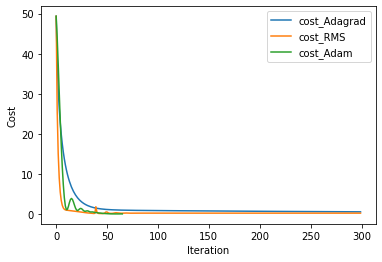

In [626]:
plt.plot(costList_Adagrad , label="cost_Adagrad")
plt.plot(costList_RMS , label="cost_RMS")
plt.plot(costList_Adam , label="cost_Adam")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

## cost of adam and RMS can reach the min cost faster than Adagrad 


## plot theta_0 vs cost

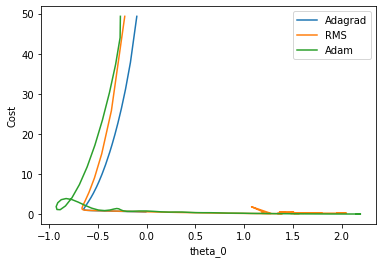

In [627]:
plt.plot(theta_0_lst_Adagrad,costList_Adagrad,label="Adagrad")
plt.plot(theta_0_lst_RMS,costList_RMS,label="RMS")
plt.plot(theta_0_bias_lst_Adam,costList_Adam,label="Adam")
plt.xlabel("theta_0")
plt.ylabel("Cost")
plt.legend()
plt.show()

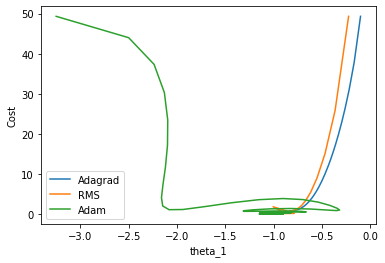

In [628]:
plt.plot(theta_1_lst_Adagrad,costList_Adagrad,label="Adagrad")
plt.plot(theta_1_lst_RMS,costList_RMS,label="RMS")
plt.plot(theta_1_bias_lst_Adam,costList_Adam,label="Adam")
plt.xlabel("theta_1")
plt.ylabel("Cost")
plt.legend()
plt.show()

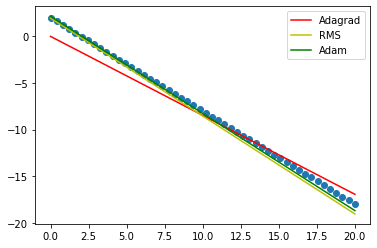

In [629]:
plt.scatter(x,y)
plt.plot(x,y_pred_Adagrad,c="r",label="Adagrad")
plt.plot(x,y_pred_RMS,c="y",label="RMS")
plt.plot(x,y_pred_Adam,c="g" , label="Adam")
plt.legend()
plt.show()

## Adagrad adopts the learning rate(alpha) based on the sparsity of features 
## And the RMS  keeps learning and tries to converge ,  prevents the rapid growth in v(t) , 
## And  the Adam depends on Adaptive learning rate and adaptive momentum but the RMS and Adagrad depends on adaptive learning rate only 


## Congratulations 
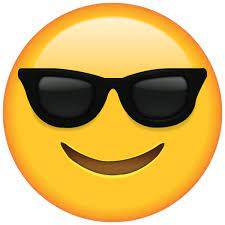